# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import re

# Import API key
import sys
import os
key = "C:\\Users\\Kelly\\Desktop\\KEYS"
sys.path.append(key)
from OpenWeatherAPI import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#I created this section to store the latitude and longitude of my cities for use later in the project.
latitude = lats.tolist()
longitude = lngs.tolist()
city_info = pd.DataFrame(list(zip(cities, latitude, longitude)), 
               columns =["City Name", "Latitude", "Longitude"]) 

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
ident = []
name = []
weather = []
clouds = []
wind = []
country = []

#for this section, I created the to_end variable to provide a countdown to the end of the loop, which I found more useful
    #than counting up as the assignment suggested. I also used an if/else statement print a final statement when the loop
    #finishes iterating.

for city in cities:
    try:
        query_url = f"{url}q={city}&appid={weather_api_key}"
        weather_response = requests.get(query_url).json()
        ident.append(weather_response['id'])
        name.append(weather_response['name'])
        weather.append(weather_response['main'])
        wind.append(weather_response['wind'])
        clouds.append(weather_response['clouds'])
        country.append(weather_response['sys']['country'])
        index = cities.index(city)
        to_end = (len(cities))-index-1
        if to_end == 0:
            print(f'Now processing data for {weather_response["name"]}, , a city in {weather_response["sys"]["country"]}.')
            print(f'All city data is now processed.')
        else:
            print(f'Now processing data for {weather_response["name"]}, a city in {weather_response["sys"]["country"]}. {to_end} more cities to process.')
    except:
        print(f'{city} was not found in our dataset, so we will not be collecting data for this city.')

Now processing data for Cape Town, a city in ZA. 630 more cities to process.
Now processing data for Thompson, a city in CA. 629 more cities to process.
Now processing data for Maceió, a city in BR. 628 more cities to process.
Now processing data for São Filipe, a city in CV. 627 more cities to process.
Now processing data for Punta Arenas, a city in CL. 626 more cities to process.
Now processing data for Sonoita, a city in MX. 625 more cities to process.
Now processing data for Qaanaaq, a city in GL. 624 more cities to process.
Now processing data for Mataura, a city in NZ. 623 more cities to process.
Now processing data for Hobart, a city in AU. 622 more cities to process.
Now processing data for Prince Rupert, a city in CA. 621 more cities to process.
Uzumlu was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Sørland, a city in NO. 619 more cities to process.
Now processing data for Paratinga, a city in BR. 618 more cities to proces

Now processing data for Necochea, a city in AR. 524 more cities to process.
Now processing data for Sarangani, a city in PH. 523 more cities to process.
Now processing data for Kungurtug, a city in RU. 522 more cities to process.
Now processing data for Cabo San Lucas, a city in MX. 521 more cities to process.
Now processing data for Mezen', a city in RU. 520 more cities to process.
Now processing data for Yaan, a city in NG. 519 more cities to process.
Now processing data for Portland, a city in US. 518 more cities to process.
Now processing data for Saint-François, a city in FR. 517 more cities to process.
Now processing data for Ürümqi, a city in CN. 516 more cities to process.
Palabuhanratu was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Jiayuguan City, a city in CN. 514 more cities to process.
Now processing data for Cap-aux-Meules, a city in CA. 513 more cities to process.
Now processing data for Bengkulu, a city in ID. 512 m

Now processing data for Nantucket, a city in US. 419 more cities to process.
Now processing data for Nome, a city in US. 418 more cities to process.
Now processing data for Puerto Escondido, a city in MX. 417 more cities to process.
Now processing data for Yellowknife, a city in CA. 416 more cities to process.
Now processing data for Chicama, a city in PE. 415 more cities to process.
Now processing data for Cherskiy, a city in RU. 414 more cities to process.
Now processing data for Washington, a city in US. 413 more cities to process.
Now processing data for Ploskoye, a city in RU. 412 more cities to process.
Now processing data for Saint Paul Harbor, a city in US. 411 more cities to process.
Now processing data for Kruisfontein, a city in ZA. 410 more cities to process.
Now processing data for Lebu, a city in CL. 409 more cities to process.
Now processing data for Road Town, a city in VG. 408 more cities to process.
Now processing data for Kavieng, a city in PG. 407 more cities to pro

Now processing data for Ouésso, a city in CG. 312 more cities to process.
Now processing data for Greensboro, a city in US. 311 more cities to process.
Now processing data for Tamandaré, a city in BR. 310 more cities to process.
Now processing data for Pala, a city in TD. 309 more cities to process.
Kegayli was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Maku, a city in IR. 307 more cities to process.
Now processing data for Bilibino, a city in RU. 306 more cities to process.
Now processing data for Ihiala, a city in NG. 305 more cities to process.
Now processing data for Naryan-Mar, a city in RU. 304 more cities to process.
Now processing data for Wakkanai, a city in JP. 303 more cities to process.
Now processing data for Chingola, a city in ZM. 302 more cities to process.
Now processing data for Rocky Mountain House, a city in CA. 301 more cities to process.
Now processing data for Saint George, a city in US. 300 more cities to p

Now processing data for Russell, a city in US. 206 more cities to process.
Now processing data for Iracoubo, a city in GF. 205 more cities to process.
Now processing data for Eenhana, a city in NA. 204 more cities to process.
Now processing data for Ampanihy, a city in MG. 203 more cities to process.
Now processing data for Hatta, a city in IN. 202 more cities to process.
Now processing data for Pevek, a city in RU. 201 more cities to process.
Now processing data for Villazón, a city in BO. 200 more cities to process.
Now processing data for Peace River, a city in CA. 199 more cities to process.
Now processing data for Melilla, a city in ES. 198 more cities to process.
Now processing data for Sémbé, a city in CG. 197 more cities to process.
Now processing data for Muscat, a city in OM. 196 more cities to process.
Now processing data for Arrondissement de Bastia, a city in FR. 195 more cities to process.
Now processing data for Chahuites, a city in MX. 194 more cities to process.
Now pr

Now processing data for Henties Bay, a city in NA. 101 more cities to process.
Now processing data for Helong, a city in CN. 100 more cities to process.
Now processing data for Guaraciaba do Norte, a city in BR. 99 more cities to process.
Now processing data for Belyy Yar, a city in RU. 98 more cities to process.
Yanchukan was not found in our dataset, so we will not be collecting data for this city.
Now processing data for Micheweni, a city in TZ. 96 more cities to process.
Now processing data for Teya, a city in RU. 95 more cities to process.
Now processing data for Santo Ângelo, a city in BR. 94 more cities to process.
Now processing data for Baghdad, a city in IQ. 93 more cities to process.
Now processing data for Boa Vista, a city in BR. 92 more cities to process.
Now processing data for San Cristobal, a city in VE. 91 more cities to process.
Now processing data for Ankang, a city in CN. 90 more cities to process.
Now processing data for Auki, a city in SB. 89 more cities to proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
rows = zip(ident,name,clouds,wind,weather,country)
with open("city_data.csv", "w", encoding="utf-8") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

In [13]:
ugly_df = pd.read_csv('city_data.csv', header = None)
ugly_df.columns = ["City ID", "City Name", "Cloudiness", "Wind Speed", "Weather Data", "Country",]

ugly_weather_df = pd.DataFrame(ugly_df["Weather Data"].str.split(',', expand=True).values,
             columns=["Temperature", "Feels Like", "Min Temp", "Max Temp", "Barometric Pressure", "Humidity", "Sea Level", "Ground Level"])
better_df = ugly_df.join(ugly_weather_df).drop(["Weather Data"], axis =1)

#i feel like there is probably a better way to code this section? this seems very heavy-handed. i tried to figure
    #out a way to loop through the column names and perform the chained functions that way, but i couldn't get it to work.
better_df["Temperature"] = better_df["Temperature"].str.split().str[-1].str.replace('\W', '').replace('}','',regex=True).astype(float)
better_df["Feels Like"] = better_df["Feels Like"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Min Temp"] = better_df["Min Temp"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Max Temp"] = better_df["Max Temp"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Barometric Pressure"] = better_df["Barometric Pressure"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Humidity"] = better_df["Humidity"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Sea Level"] = better_df["Sea Level"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Ground Level"] = better_df["Ground Level"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Wind Speed"] = better_df["Wind Speed"].str.split().str[-1].replace('}','',regex=True).astype(float)
better_df["Cloudiness"] = better_df["Cloudiness"].str.split().str[-1].replace('}','',regex=True).astype(float)

better_df

,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
0,3369157,Cape Town,20.0,190.00,ZA,29131.0,288.25,290.93,292.04,1016.0,77.0,NaN,NaN
1,6165406,Thompson,20.0,260.00,CA,24615.0,240.15,246.15,246.15,1023.0,75.0,NaN,NaN
2,3395981,Maceió,20.0,120.00,BR,29915.0,301.51,299.15,299.15,1013.0,74.0,NaN,NaN
3,3374210,São Filipe,61.0,56.00,CV,29629.0,295.63,296.29,296.29,1014.0,74.0,1014.0,1009.0
4,3874787,Punta Arenas,40.0,260.00,CL,2794.0,267.36,278.71,280.15,997.0,65.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2015852,Svetlaya,86.0,297.00,RU,25703.0,248.77,257.03,257.03,1009.0,81.0,1009.0,1008.0
573,3105522,Bereda,98.0,5.81,ES,28036.0,276.55,279.82,281.48,1009.0,99.0,NaN,NaN
574,3449053,São Gotardo,54.0,292.00,BR,29304.0,294.92,293.04,293.04,1012.0,84.0,1012.0,898.0
575,2352250,Afikpo,90.0,205.00,NG,29826.0,301.48,298.26,298.26,1010.0,85.0,1010.0,998.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#checking if any cities in my dataframe have humidty > 100%
better_df.sort_values(["Humidity"], ascending=False)


,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
568,1252783,Yārāda,16.0,0.0,IN,29315.0,296.15,293.15,293.15,1013.0,100.0,NaN,NaN
258,3116689,Miranda de Ebro,40.0,320.0,ES,28194.0,280.62,281.15,282.59,1010.0,100.0,NaN,NaN
561,3480908,La Asuncion,0.0,90.0,VE,29415.0,294.77,294.15,294.15,1011.0,100.0,NaN,NaN
456,515805,Oktyabr'skoye,0.0,0.0,RU,26915.0,265.95,269.15,269.15,1017.0,100.0,NaN,NaN
463,1151464,Phang Nga,40.0,0.0,TH,29715.0,302.62,297.15,297.15,1009.0,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2349431,Sabla,0.0,56.0,NG,29823.0,293.79,298.23,298.23,1010.0,18.0,1010.0,981.0
281,3994469,Ojinaga,1.0,45.0,MX,28791.0,283.21,287.59,288.15,1014.0,18.0,NaN,NaN
147,5551535,Apache Junction,20.0,290.0,US,2875.0,278.97,286.48,288.71,1014.0,16.0,NaN,NaN
125,2173911,Broken Hill,11.0,70.0,AU,30415.0,299.85,304.15,304.15,1011.0,15.0,NaN,NaN


In [15]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data = better_df.loc[better_df['Humidity'] < 101]
clean_city_data

,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level
0,3369157,Cape Town,20.0,190.00,ZA,29131.0,288.25,290.93,292.04,1016.0,77.0,NaN,NaN
1,6165406,Thompson,20.0,260.00,CA,24615.0,240.15,246.15,246.15,1023.0,75.0,NaN,NaN
2,3395981,Maceió,20.0,120.00,BR,29915.0,301.51,299.15,299.15,1013.0,74.0,NaN,NaN
3,3374210,São Filipe,61.0,56.00,CV,29629.0,295.63,296.29,296.29,1014.0,74.0,1014.0,1009.0
4,3874787,Punta Arenas,40.0,260.00,CL,2794.0,267.36,278.71,280.15,997.0,65.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2015852,Svetlaya,86.0,297.00,RU,25703.0,248.77,257.03,257.03,1009.0,81.0,1009.0,1008.0
573,3105522,Bereda,98.0,5.81,ES,28036.0,276.55,279.82,281.48,1009.0,99.0,NaN,NaN
574,3449053,São Gotardo,54.0,292.00,BR,29304.0,294.92,293.04,293.04,1012.0,84.0,1012.0,898.0
575,2352250,Afikpo,90.0,205.00,NG,29826.0,301.48,298.26,298.26,1010.0,85.0,1010.0,998.0


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Accomplished in previous section. While the dataset I had in place at the time I wrote this code did not have any
    #cities with humidity higher than 100%, I can't guarantee that if I were to re-run the code and generate a new
    #list of cities that I wouldn't generate a city with a humidity greater than 100, so I decided to write this
    #section of code anyway.

In [17]:
# clean_city_data = clean_city_data.merge(city_info, on="City Name")
clean_city_data = pd.merge(clean_city_data, city_info,
                        how="left", on=["City Name"])
clean_city_data

,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level,Latitude,Longitude
0,3369157,Cape Town,20.0,190.00,ZA,29131.0,288.25,290.93,292.04,1016.0,77.0,NaN,NaN,-51.968991,-3.848592
1,6165406,Thompson,20.0,260.00,CA,24615.0,240.15,246.15,246.15,1023.0,75.0,NaN,NaN,59.750385,-97.258161
2,3395981,Maceió,20.0,120.00,BR,29915.0,301.51,299.15,299.15,1013.0,74.0,NaN,NaN,NaN,NaN
3,3374210,São Filipe,61.0,56.00,CV,29629.0,295.63,296.29,296.29,1014.0,74.0,1014.0,1009.0,NaN,NaN
4,3874787,Punta Arenas,40.0,260.00,CL,2794.0,267.36,278.71,280.15,997.0,65.0,NaN,NaN,-79.100128,-100.457137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2015852,Svetlaya,86.0,297.00,RU,25703.0,248.77,257.03,257.03,1009.0,81.0,1009.0,1008.0,39.219776,44.174836
573,3105522,Bereda,98.0,5.81,ES,28036.0,276.55,279.82,281.48,1009.0,99.0,NaN,NaN,70.242092,164.509014
574,3449053,São Gotardo,54.0,292.00,BR,29304.0,294.92,293.04,293.04,1012.0,84.0,1012.0,898.0,NaN,NaN
575,2352250,Afikpo,90.0,205.00,NG,29826.0,301.48,298.26,298.26,1010.0,85.0,1010.0,998.0,-74.114852,24.920317


In [18]:
clean_city_data.to_csv(r'..\VacationPy\clean_city_data.csv') #I added this in after completing WeatherPy so I could use my
    #cleaned dataframe in VacationPy.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

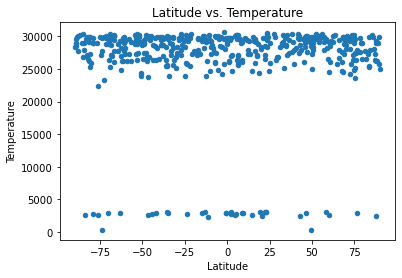

In [19]:
clean_city_data.plot.scatter("Latitude", "Temperature")
plt.title('Latitude vs. Temperature')
plt.savefig('WeatherPy_PNG_files/lat_vs_temp.png')

## Latitude vs. Humidity Plot

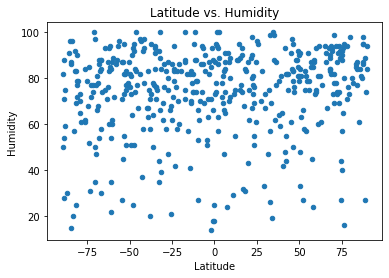

In [20]:
clean_city_data.plot.scatter("Latitude", "Humidity")
plt.title('Latitude vs. Humidity')
plt.savefig('WeatherPy_PNG_files/lat_vs_hum.png')

## Latitude vs. Cloudiness Plot

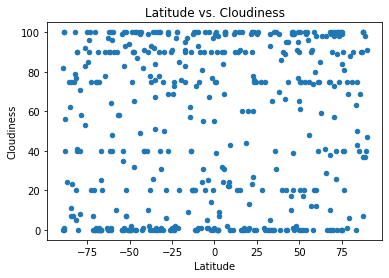

In [21]:
clean_city_data.plot.scatter("Latitude", "Cloudiness")
plt.title('Latitude vs. Cloudiness')
plt.savefig('WeatherPy_PNG_files/lat_vs_cloud.png')

## Latitude vs. Wind Speed Plot

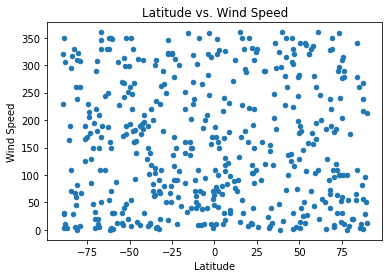

In [22]:
clean_city_data.plot.scatter("Latitude", "Wind Speed")
plt.title('Latitude vs. Wind Speed')
plt.savefig('WeatherPy_PNG_files/lat_vs_wind.png')

## Linear Regression

In [24]:
northern_hem = clean_city_data.loc[clean_city_data['Latitude'] > 0]
southern_hem = clean_city_data.loc[clean_city_data['Latitude'] < 0]
test = clean_city_data.loc[clean_city_data['Latitude'] == 0] 
# this line was used to test whether any cities happened to
    # fall on the equator, in which case I might consider adjusting my formula. As they do not, and it's unlikely in other
    #datasets that they would, I'm comfortable leaving the data as-is and treating potential cities with a latitude of 0 as
    #outliers.
test

,City ID,City Name,Cloudiness,Wind Speed,Country,Temperature,Feels Like,Min Temp,Max Temp,Barometric Pressure,Humidity,Sea Level,Ground Level,Latitude,Longitude


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

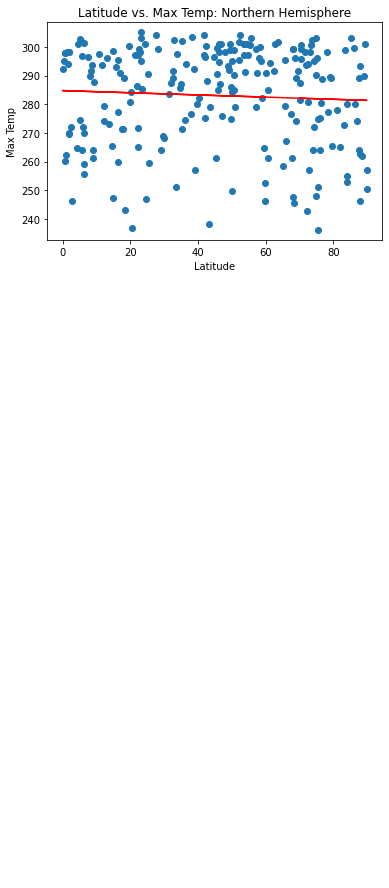

In [25]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp: Northern Hemisphere')
plt.savefig('WeatherPy_PNG_files/nh_maxtemp_lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

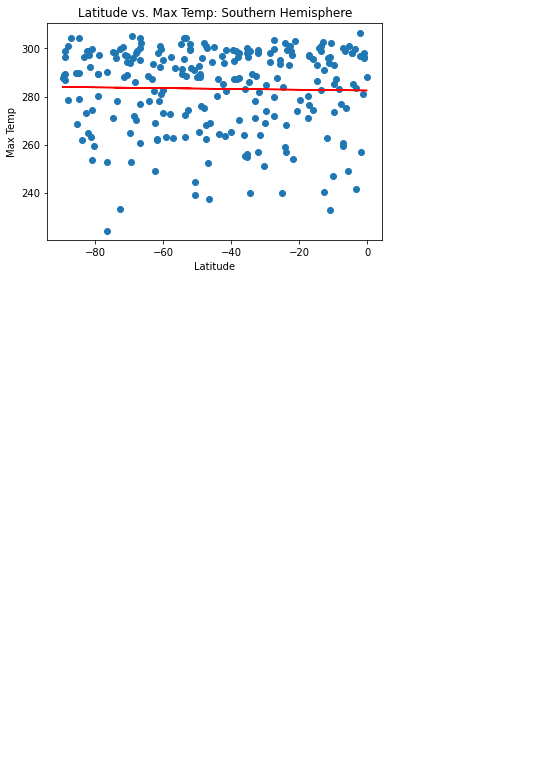

In [26]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp: Southern Hemisphere')
plt.savefig('WeatherPy_PNG_files/sh_maxtemp_lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

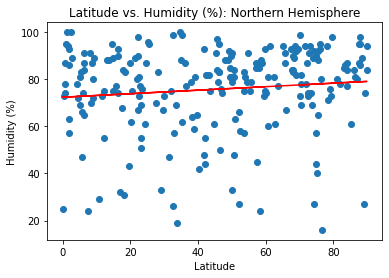

In [27]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%): Northern Hemisphere')
plt.savefig('WeatherPy_PNG_files/nh_hum_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

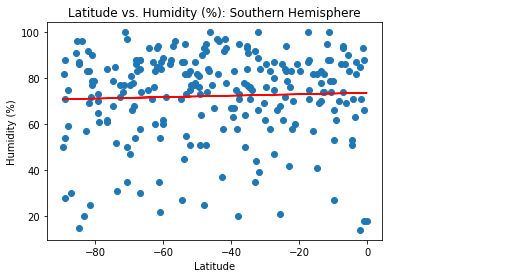

In [28]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%): Southern Hemisphere')
plt.savefig('WeatherPy_PNG_files/sh_hum_maxtemp.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

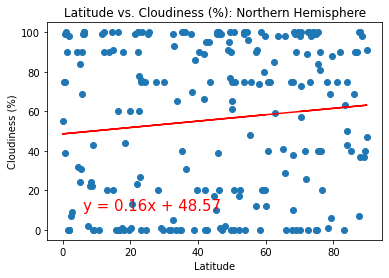

In [29]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%): Northern Hemisphere')
plt.savefig('WeatherPy_PNG_files/nh_cloud_lat.png')

#why is there a formula on this chart?

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

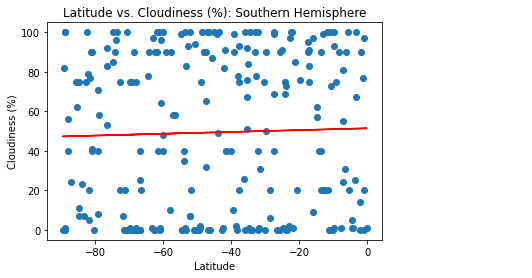

In [30]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%): Southern Hemisphere')
plt.savefig('WeatherPy_PNG_files/sh_cloud_lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

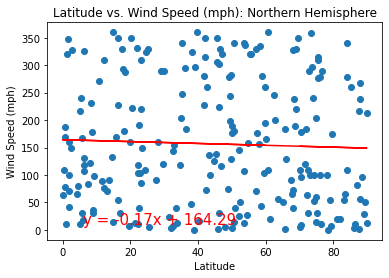

In [31]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph): Northern Hemisphere')
plt.savefig('WeatherPy_PNG_files/nh_wind_lat.png')
#why is there a formula on this chart?

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

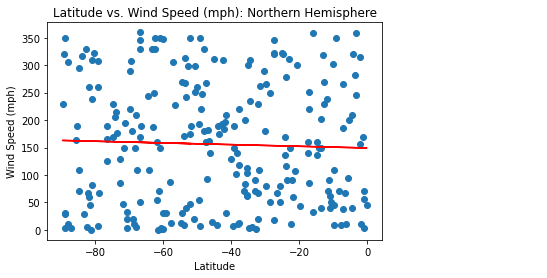

In [32]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph): Northern Hemisphere')
plt.savefig('WeatherPy_PNG_files/sh_wind_lat.png')